Load the 📊`tidyverse`, 🐧`palmerpengions`, and ⚖`scales` packages.

In [1]:
library(tidyverse)
library(palmerpenguins)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Use `geom_density` to create the following figure from the `penguins` data.

<img src="https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/07/palmer-kde.png" 
     style="width: 700px;" />

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


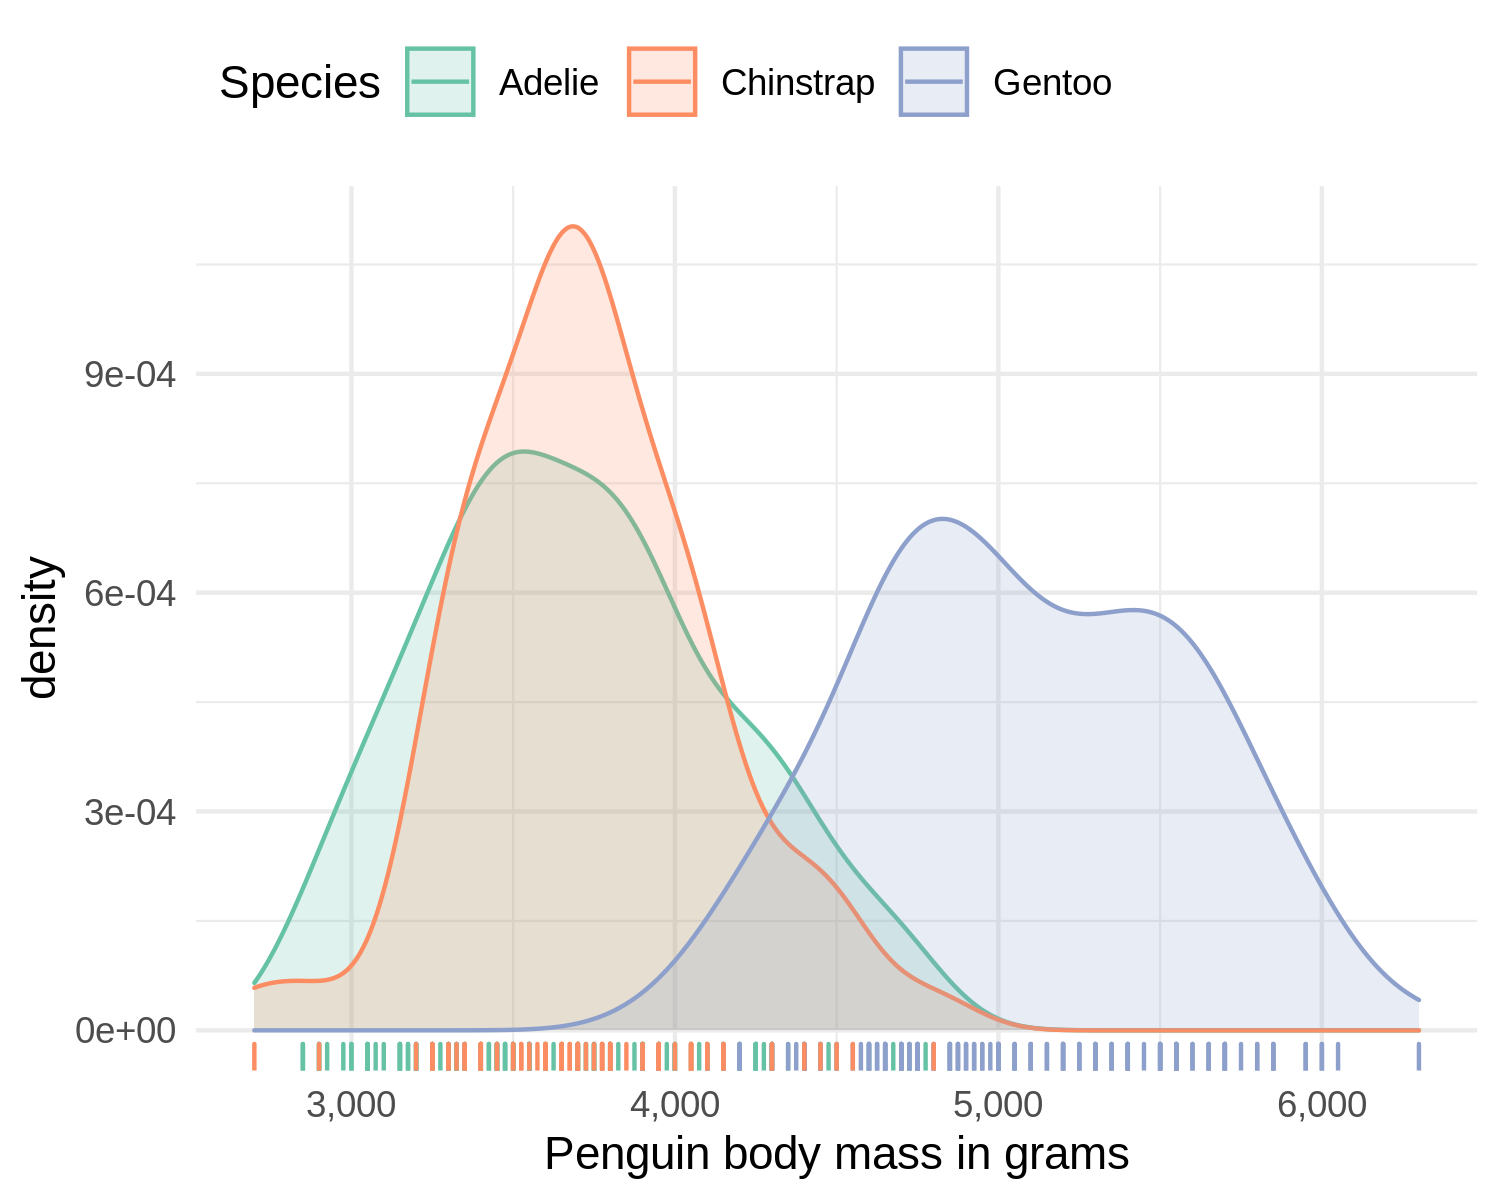

In [2]:
p = ggplot(penguins, aes(x = body_mass_g, color = species, fill = species))

p = p + geom_density(alpha = .2)

p = p + geom_rug()
#each tick mark is the body mass of one of the penguins sampled (this provides rug at bottom)

p = p + scale_color_brewer(palette = "Set2") + scale_fill_brewer(palette = "Set2")
#this changes the default colors used

p = p + theme_minimal()

p = p + labs(x = "Penguin body mass in grams", color = 'Species', fill = 'Species')
#changes the label to be what you want

p = p + theme(legend.position = 'top', legend.justification = 'left')
#puts legend on the top

p = p + scale_x_continuous(labels = comma)

p

🛑 **STOP HERE** 🛑

What columns do we need to make the **ECDF** equivalent of the above chart using `geom_point` + `geom_line`?

Read the following code snippet. Can you make sense of what it's doing? What do you think the output will be?

```R
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))
```

Copy the snippet above and execute it. What's does the `ecdf` table look like?

In [3]:
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))
    #mutate will add a column to our dataset
ecdf  %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,rn,fraction_of_penguins
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>
Chinstrap,Dream,46.9,16.6,192,2700,female,2008,1,0.014705882
Adelie,Biscoe,36.5,16.6,181,2850,female,2008,1,0.006578947
Adelie,Biscoe,36.4,17.1,184,2850,female,2008,2,0.013157895
Adelie,Biscoe,34.5,18.1,187,2900,female,2008,3,0.019736842
Adelie,Dream,33.1,16.1,178,2900,female,2008,4,0.026315789
Adelie,Torgersen,38.6,17.0,188,2900,female,2009,5,0.032894737


Using the `ecdf` table, create an **ECDF** chart of penguin body mass grouped by species.

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


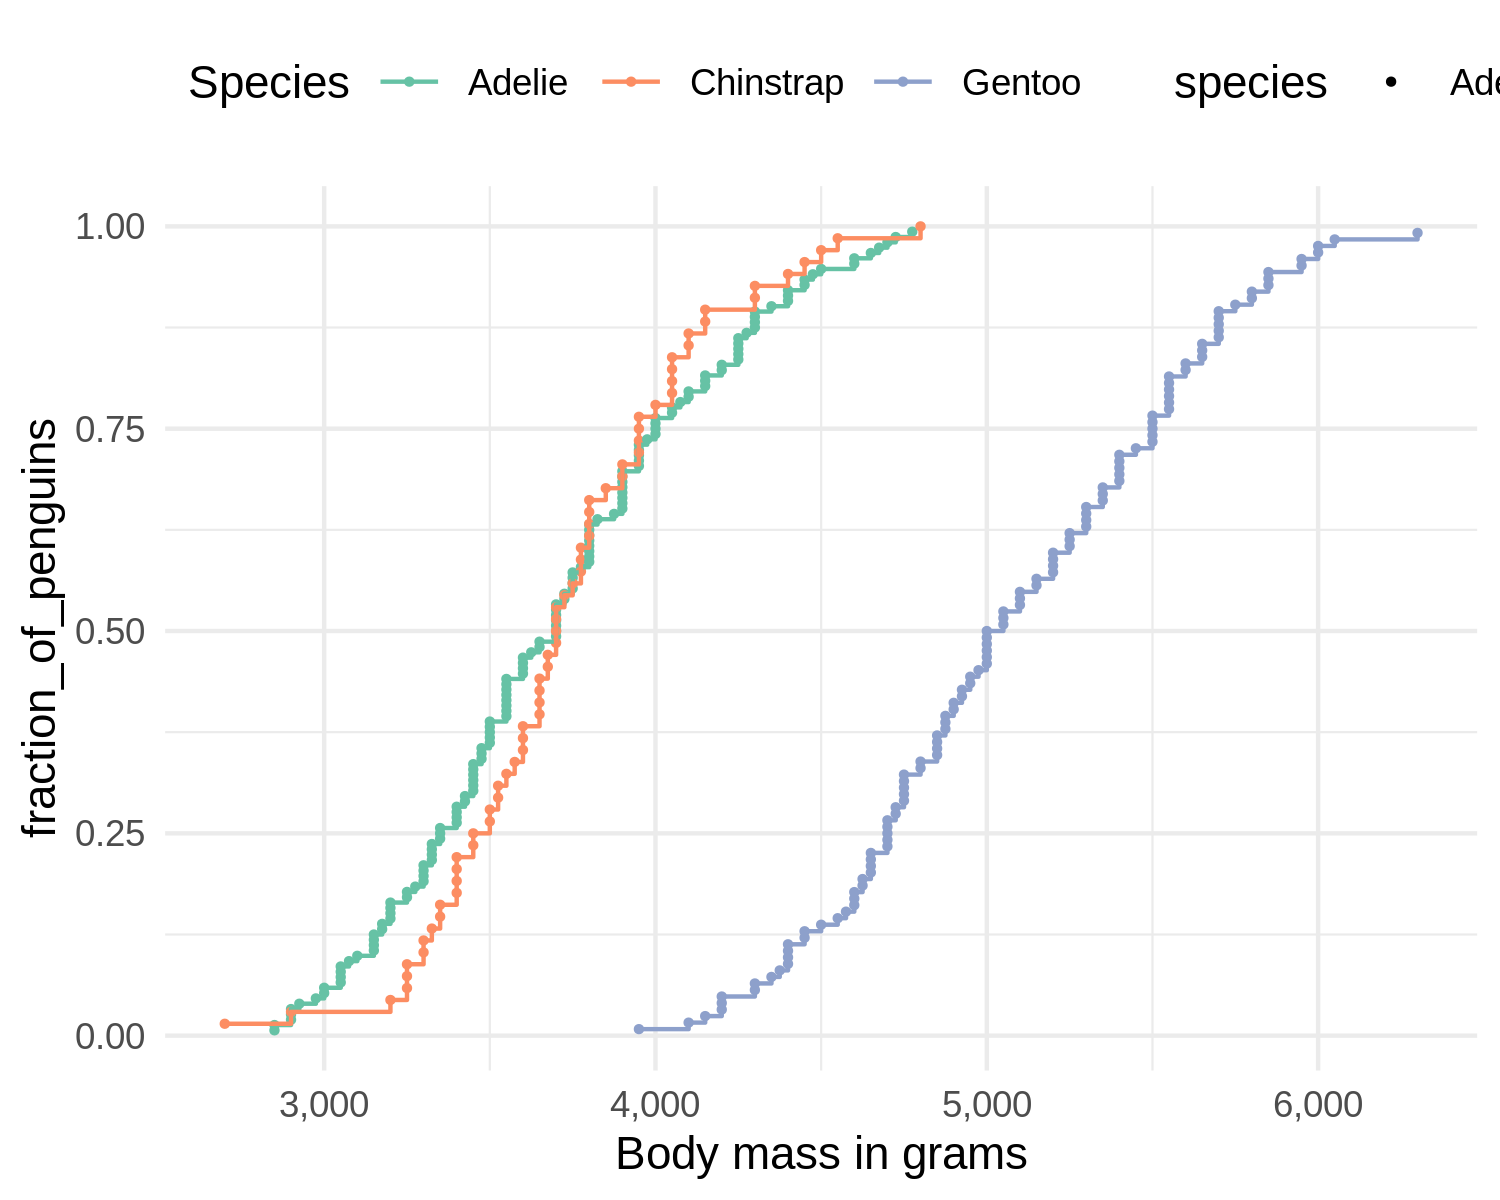

In [6]:
p = ggplot(ecdf, aes(x = body_mass_g, y = fraction_of_penguins, color = species, fill = species))

p = p + geom_point(size = .5) + geom_step()
#geom step connect two points with steps (like right angles)

p = p + scale_color_brewer(palette = "Set2") + scale_fill_brewer(palette = "Set2")

p = p + theme_minimal()

p = p + labs(x = "Body mass in grams", color = 'Species')

p = p + theme(legend.position = 'top', legend.justification = 'left')

p = p + scale_x_continuous(labels = comma)

p

Uncomment the code below, change the cell to markdown and execute if you want to see my solution.

 ![](https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/07/palmer-ecdf.png)